In [82]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.ar_model import AR

# for MA models just put AR term to zero
from statsmodels.tsa.arima_model import ARMA

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [83]:
stores = pd.read_csv('assets/datasets/stores.csv')

In [84]:
# stores.head()

In [85]:
train = pd.read_csv('assets/datasets/train.csv')

In [86]:
# train.head()

In [87]:
features = pd.read_csv('assets/datasets/features.csv')

In [88]:
wmart_merge_1 = pd.merge(train, stores, how='left', on='Store')

In [89]:
wmart = pd.merge(wmart_merge_1, features, how='left', on=['Date', 'Store'])

  
*Check shape of the merged df relative to the training set*
  

In [90]:
wmart.shape

(421570, 17)

In [91]:
wmart.index = pd.to_datetime(wmart.Date)

In [92]:
wmart = wmart[['Date', 'Weekly_Sales']][wmart['Store'] == 1]

In [100]:
store1 = wmart.groupby('Date').sum()

In [106]:
store1.index = pd.to_datetime(store1.index)

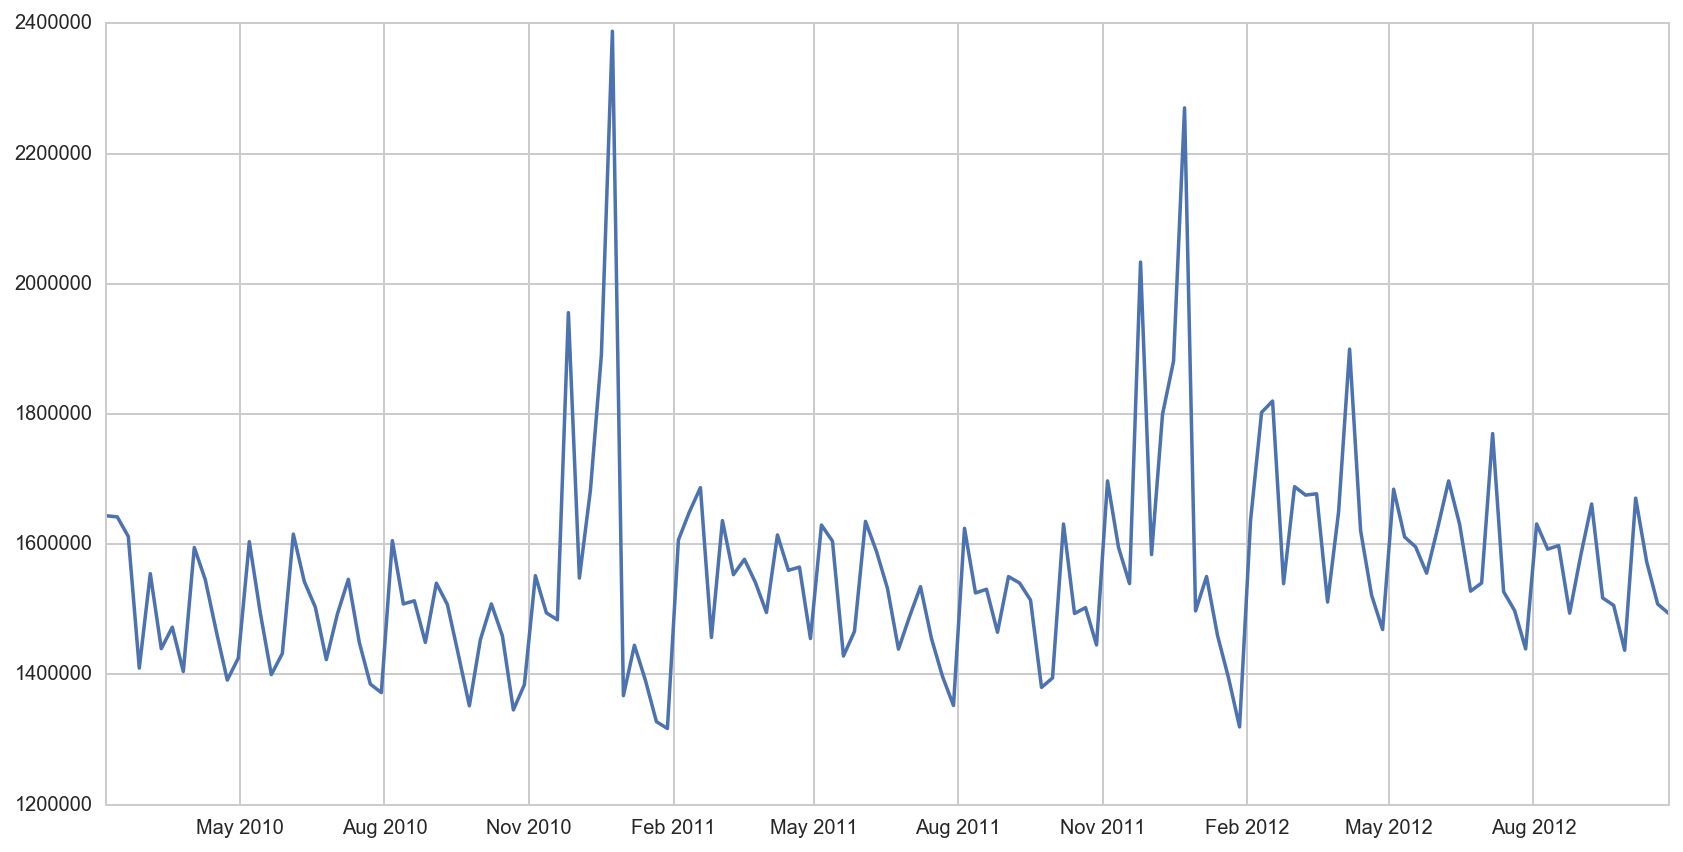

In [111]:
plt.figure(figsize=(14,7))
plt.plot(store1)
plt.show()

In [128]:
def rolling_week(weeks):
    return store1['Weekly_Sales'].resample('W').mean().rolling(window=weeks).mean()

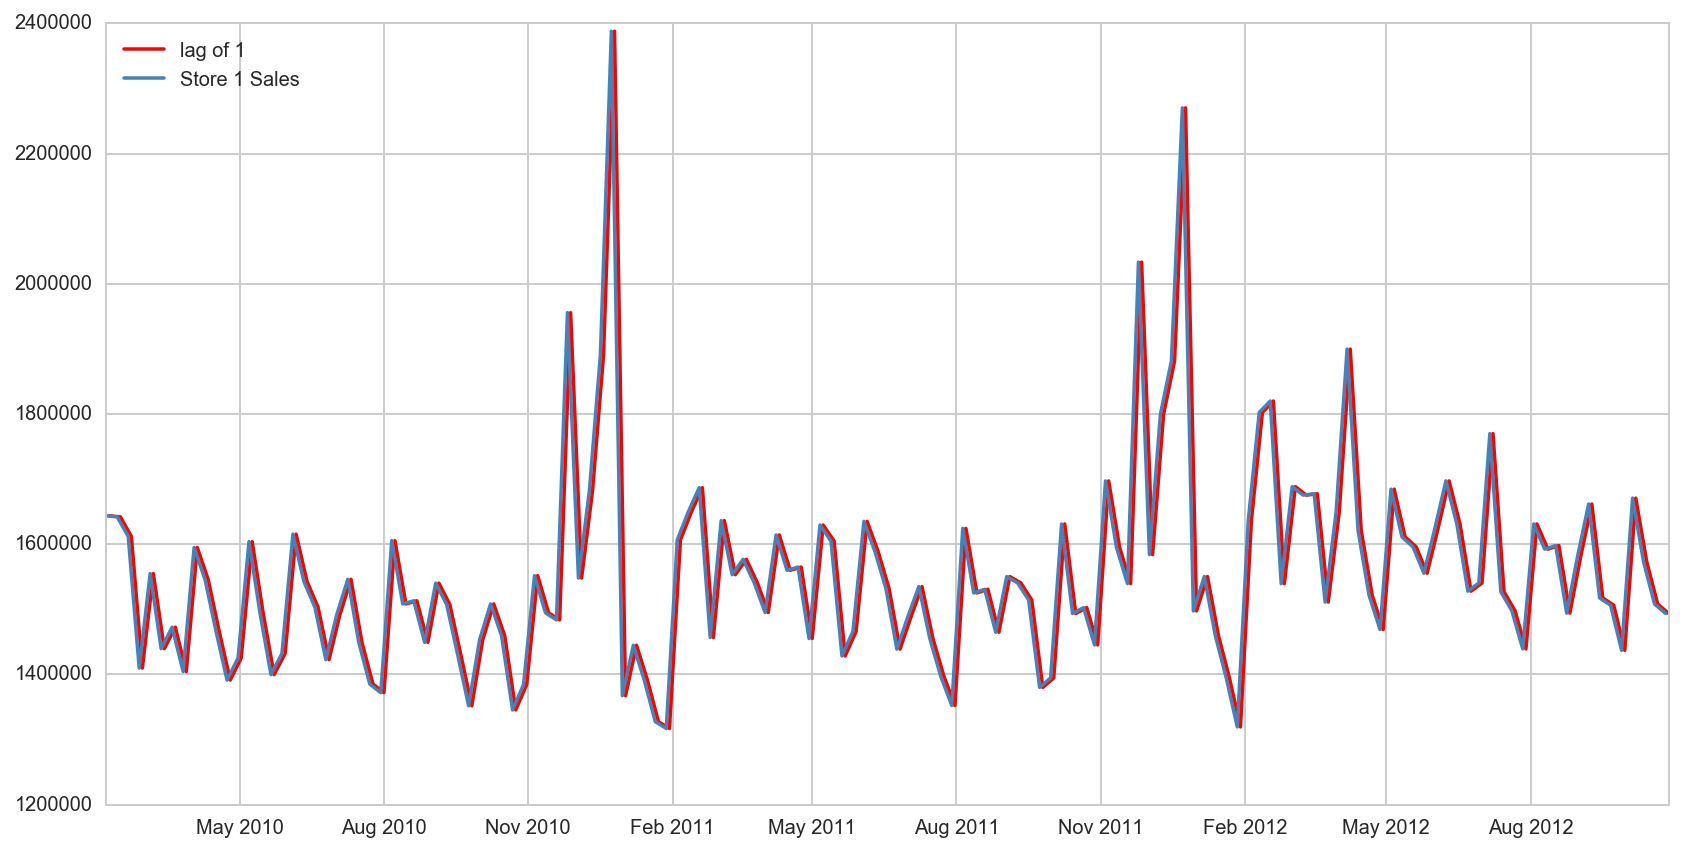

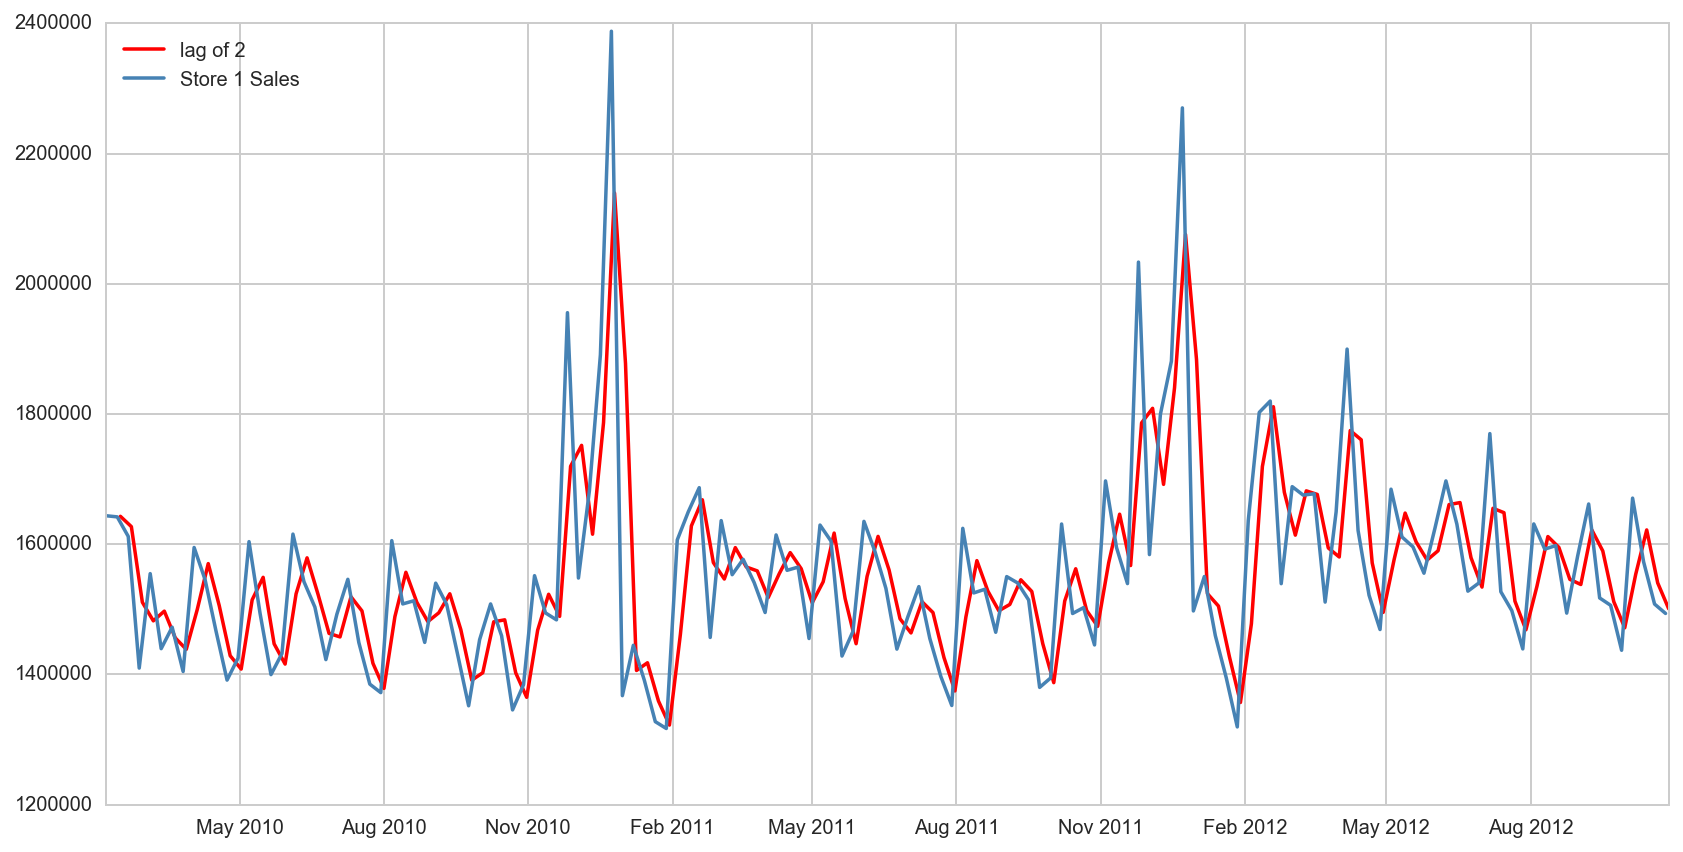

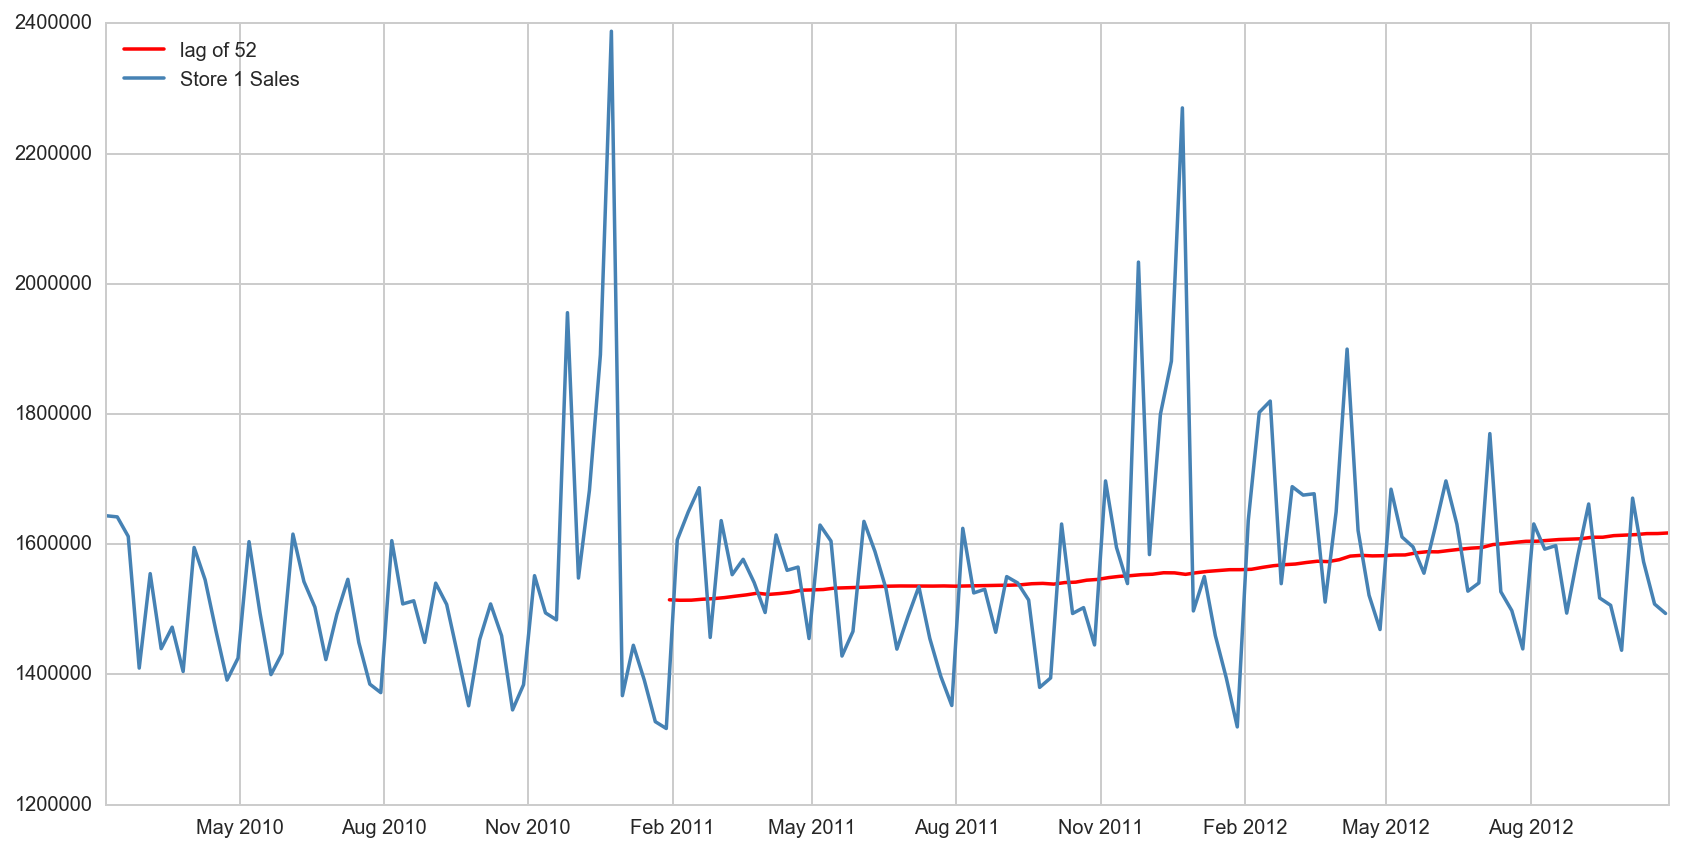

In [134]:
for i in [1,2,52]:
    plt.figure(figsize=(14,7))
    plt.plot(rolling_week(i), color='red',  label='lag of %s' % str(i) )
    plt.plot(store1, color='steelblue', label = 'Store 1 Sales' )
    plt.legend(loc='upper left')
    plt.show()

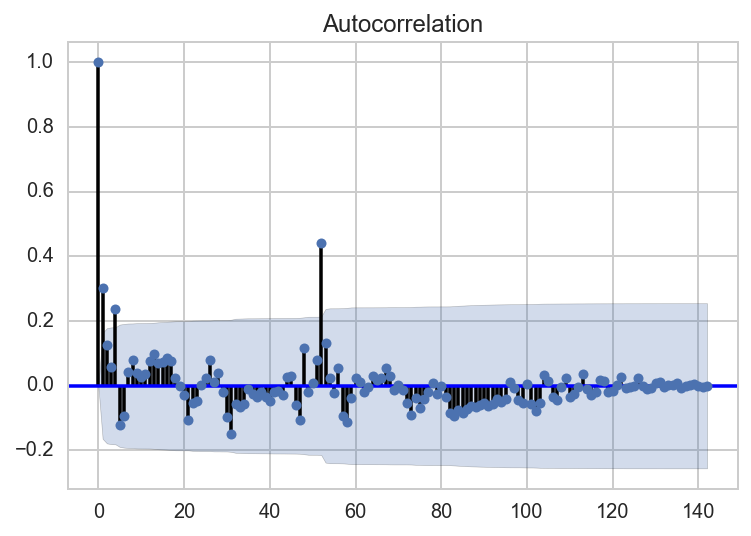

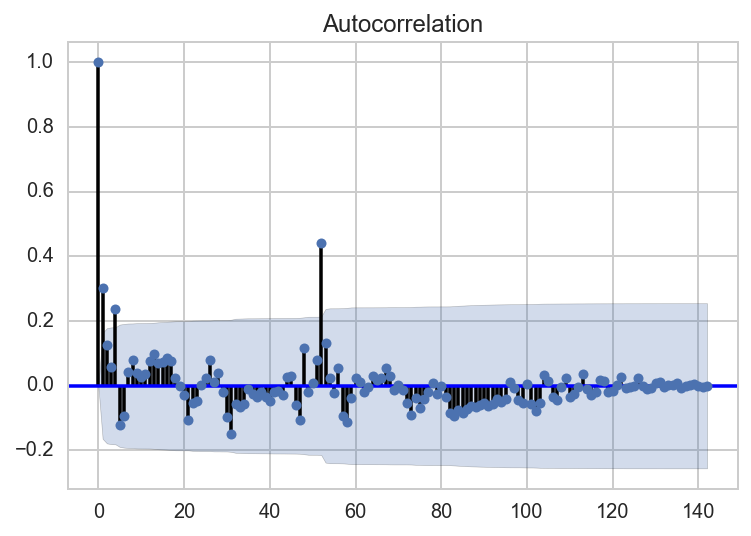

In [126]:
plot_acf(store1['Weekly_Sales'])

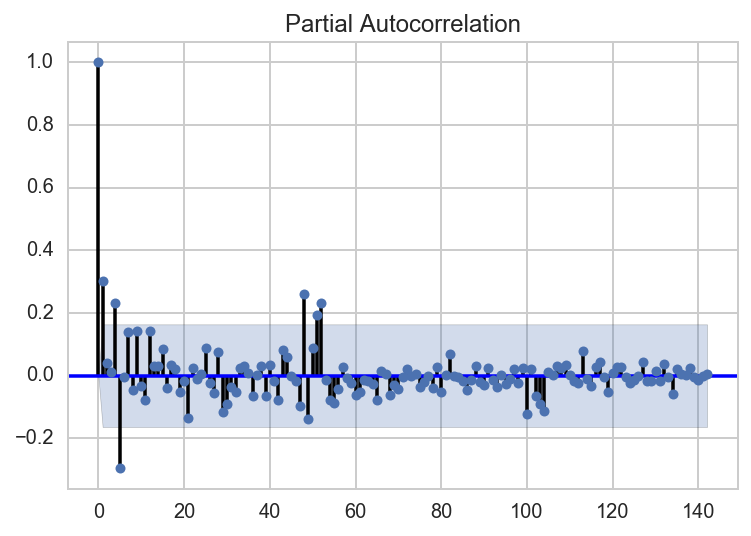

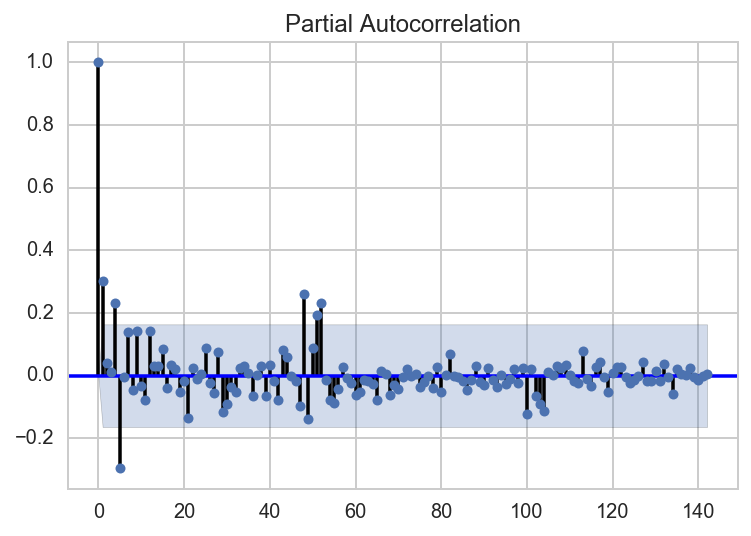

In [127]:
plot_pacf(store1['Weekly_Sales'])

In [135]:
from sklearn.cross_validation import train_test_split